In [ ]:
import pickle
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

target_file_name = "/media/airs/BIN/graduation_design_env/all_scenes_data_v4.pkl"

data = load_pickle(target_file_name)

In [1]:
print(len(data))
new_data = []
for i in data:
    #print(i)
    temp_data = []
    for j in i:
        if j[-1] > 5:
            temp_data.append(5)
        else:
            temp_data.append(j[-1])
    #    print(j[-1])
    new_data.append(temp_data)

NameError: name 'data' is not defined

0     [-3, -3, 3, -3, 0, -3, -3, -3, -3, 0, -3, -3, -3, 3, 0, -3, 1, -3, 1, 0, -3, 1, -3, -3, 0, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, 1, -3, -3, -3, 1, 1, 1, -3, -3, 3, 0, 0, 3, -3, 1, 3, 3, -3, -3, 1, -3, -3, -3, -3, -3, 0, 0, 0, -3, -3, -3, 3, 0, -3, -3, 3, -3, -3, -3, -3, 3, -3, -3, -3, -3, -3, -3, -3, -3, -3, 0, 3, 0, -3, -3, -3, -3, -3, -3, -3, 3, -3, 0, -3, -3, 3, -3, -3, -3, -3, -3, 3, -3, -3, -3, -3, -3, -3, -3, -3, 0, 0, 0, -3, -3, -3, -3, 0, -3, 3, -3, 1, 0, -3, 3, -3, -3, -3, -3, -3, -3, 3, -3, -3, -3, -3, 3, 0, -3, -3, 0, 0, -3, -3, -3, -3, 1, 3, -3, -3, -3, 3, -3, 3, 0, 0, -3, -3, 3, 0, 0, -3, 0, -3, -3, 0, -3, 0, -3, -3, -3, -3, -3, -3, -3, 3, -3, -3, -3, -3, -3, -3, -3, -3, -3, 0, 0]
1     [-3, -3, -3, -3, 0, -3, -3, -3, -3, -3, -3, -3, -3, -3, 3, -3, 3, -3, -3, 3, 1, 1, 1, 1, 1, 3, -3, 0, 3, -3, 3, 3, 0]
2     [-3, -3, -3, -3, 0, -3, -3, 3, -3, -3, -3, -3, 1, 1, -3, -3, -3, -3, 0, -3, -3, -3, 0, -3, 0, -3, -3, 3, 0, 0, 

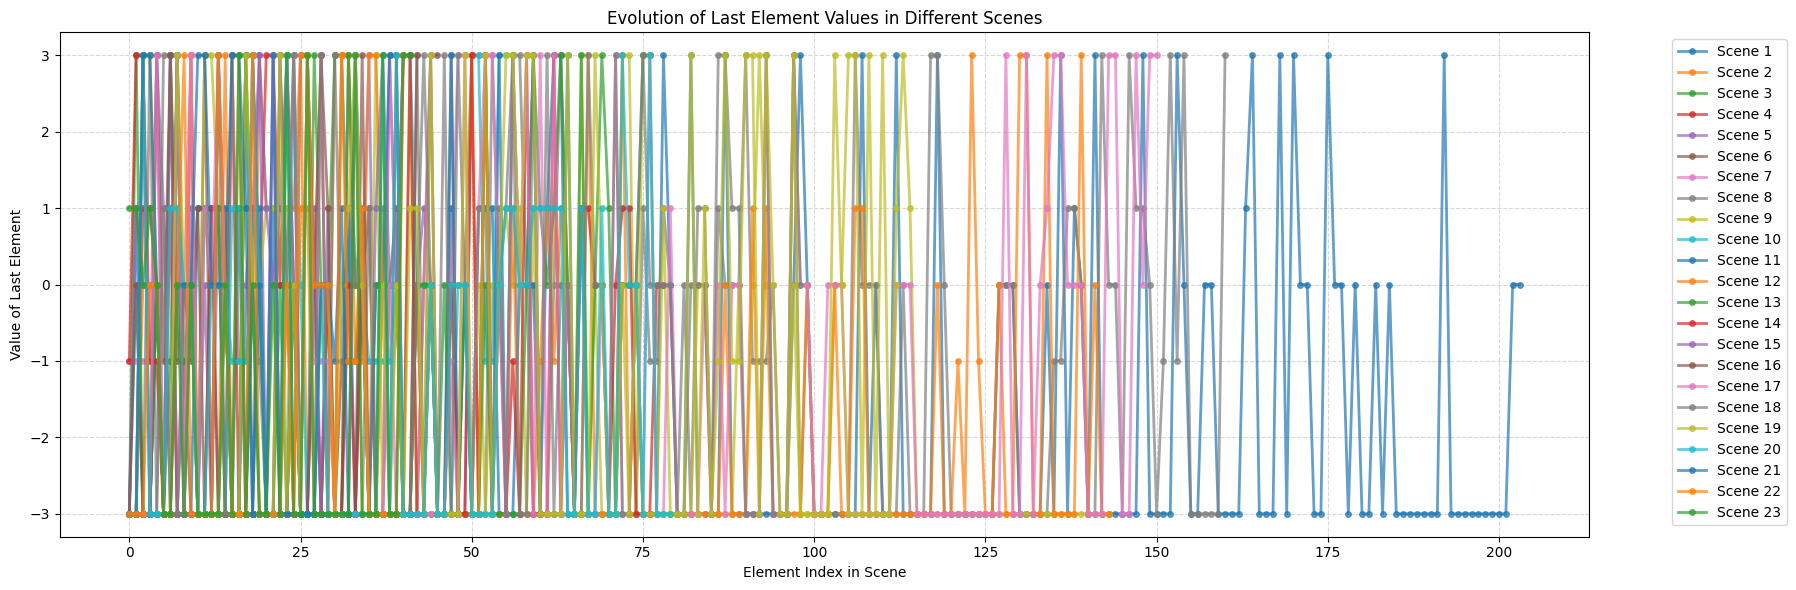

In [4]:
import matplotlib.pyplot as plt
import pickle

def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data
target_file_name = "/media/airs/BIN/graduation_design_env/src/all_scenes_data_v4_2.pkl"

# 加载数据
data = load_pickle(target_file_name)

# 创建图形
plt.figure(figsize=(18, 6))

# 为每个子列表绘制独立曲线
for scene_idx, scene_data in enumerate(data):
    scene_data = [item[-1] for item in scene_data]
    print(scene_idx , "   ", scene_data)
    # 提取每个元素的最后一个值
    values = scene_data
    # 绘制曲线（带透明度以便区分重叠部分）
    plt.plot(values, 
             alpha=0.7,
             linewidth=2,
             marker='o',
             markersize=4,
             label=f'Scene {scene_idx + 1}')

# 添加图表元素
plt.title('Evolution of Last Element Values in Different Scenes')
plt.xlabel('Element Index in Scene')
plt.ylabel('Value of Last Element')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 将图例放在图表外右侧

# 自动调整布局并显示
plt.tight_layout()
plt.show()

In [3]:
import matplotlib.pyplot as plt
import pickle

def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data
target_file_name = "/media/airs/BIN/graduation_design_env/all_scenes_data_v4_1.pkl"

# 加载数据
data = load_pickle(target_file_name)

# 创建图形
plt.figure(figsize=(18, 6))
save_file = './all_scenes_data_v4_2.pkl'

# 为每个子列表绘制独立曲线
for scene_idx, scene_data in enumerate(data):
    for item_id, item in enumerate(scene_data):
        if item[-1] > 3 :
            data[scene_idx][item_id] = data[scene_idx][item_id][:6] + (3,) 
        elif item[-1] < -3:
            data[scene_idx][item_id] = data[scene_idx][item_id][:6] + (-3,) 
with open(save_file, 'wb') as f:
    pickle.dump(data, f)


<Figure size 1800x600 with 0 Axes>

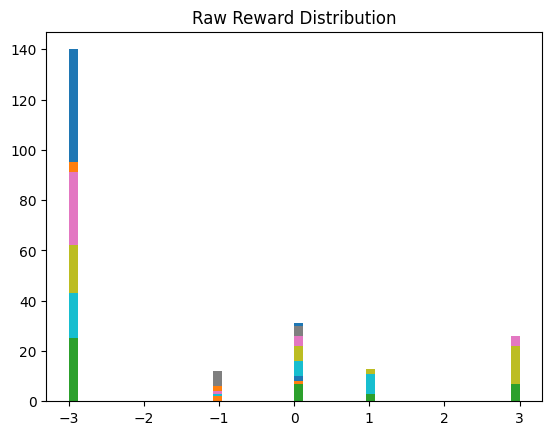

In [5]:
for scene_idx, scene_data in enumerate(data):
    scene_data = [item[-1] for item in scene_data]
    # print(scene_idx , "   ", scene_data)
    # 提取每个元素的最后一个值
    rewards = scene_data
    plt.hist(rewards, bins=50)
    plt.title('Raw Reward Distribution')
    plt.savefig('reward_distribution.png')

In [7]:
import json

# Original string
data_str = '''{  "Inference Part": "The evaluation will be based on the given criteria for each action performed by the agents.",  "Rewritten Reward Value": [-3, 0, 3, -3, 0],  "Reason for Rewriting": "1. The first action (Agent 1 goes to Kitchen) does not directly contribute to the task since the goal items are already known to be elsewhere. It neither advances the task nor expands the action space or improves observation coverage. Therefore, the reward is -3. \\n" +                          "2. The second action (Agent 0 grasps the bread) is relevant as it moves one of the required items closer to the goal, but it does not directly collaborate with Agent 1's actions and does not significantly expand the action space or improve observation coverage. Therefore, the reward is 0. \\n" +                          "3. The third action (Agent 0 transports the held items to the bed) is highly effective as it completes one of the required tasks. However, it does not expand the action space or improve observation coverage beyond what was already known. Therefore, the reward is 3. \\n" +                          "4. The fourth action (Agent 1 grasps the plate) is not directly relevant to the task since the plate is empty and not needed for transportation. It does not expand the action space or improve observation coverage. Therefore, the reward is -3. \\n" +                          "5. The fifth action (Agent 1 grasps another bread) is relevant as it moves another item towards the goal, but it does not collaborate with Agent 0's actions in a way that would advance the task beyond what has already been done. Therefore, the reward is 0."}'''

# Clean and load the JSON
cleaned_data_str = data_str.replace('\\n', ' ').replace('+', '').replace('\'', '"')
print(cleaned_data_str)
ans = exec(cleaned_data_str)
print(ans)
data = json.loads(cleaned_data_str)

# Print the loaded JSON data
print(json.dumps(data, indent=4))

{  "Inference Part": "The evaluation will be based on the given criteria for each action performed by the agents.",  "Rewritten Reward Value": [-3, 0, 3, -3, 0],  "Reason for Rewriting": "1. The first action (Agent 1 goes to Kitchen) does not directly contribute to the task since the goal items are already known to be elsewhere. It neither advances the task nor expands the action space or improves observation coverage. Therefore, the reward is -3.  "                           "2. The second action (Agent 0 grasps the bread) is relevant as it moves one of the required items closer to the goal, but it does not directly collaborate with Agent 1"s actions and does not significantly expand the action space or improve observation coverage. Therefore, the reward is 0.  "                           "3. The third action (Agent 0 transports the held items to the bed) is highly effective as it completes one of the required tasks. However, it does not expand the action space or improve observation 

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<string>, line 1)